In [1]:
# import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv(r'../input/loan-data-2007-2014/loan_data_2007_2014/loan_data_2007_2014.csv')

In [3]:
# check number of columns and data types of features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
# create a new column based on the loan_status column that will be our target variable
data['bad_loan'] = np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
data.drop(columns = ['loan_status'], inplace = True)
data.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
X = data.drop('bad_loan', axis = 1)
y = data['bad_loan']

In [6]:
#cols that have > 50% missing values
missing_values = data.isnull().mean()
missing_values[missing_values > 0.5]

desc                           0.729815
mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

# Data Preprocessing:

* We need to drop the columns having > 50% missing values.

* The follwing features are identifiers and can not be used in building model. id, member id, url, title, desc, zipcode and emp_title

* The sub_grade column wll also be droped as it contains the same information as the grade columns.

* Features that contain information about the future will not be included in building the model since those events are yet to occur. The features include next_pymnt_d, recoveries, collection_recovery_fee, total_rec_prncp and total_rec_late_fee

In [7]:
#dropping irrelevant cols & cols with missing values

columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                  'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code', 'mths_since_last_delinq']
data.drop(columns=columns_to_drop, inplace=True, axis=1)

data.dropna(inplace=True)

# Checking Correlation among Features

# Removing Multicolliear Features

In [8]:
 data.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  
                   'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

In [9]:
##descriptive statistics
data.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
count,376571.000000,3.765710e+05,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,376571.000000,3.765710e+05,3.765710e+05,3.765710e+05,376571.000000
mean,14.039811,7.526384e+04,17.673232,0.310512,0.776353,11.511726,0.174073,57.005921,5190.664651,11455.719202,2638.869314,3227.995357,0.010622,0.004732,1.889280e+02,1.411113e+05,3.057076e+04,0.900592
std,4.383931,5.527046e+04,7.849406,0.837229,1.036977,5.037944,0.537996,22.939261,6651.544467,8083.114285,2429.482955,5740.094974,0.117506,0.074705,1.499576e+04,1.533124e+05,3.769088e+04,0.299209
min,6.000000,4.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,35.690000,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02,0.000000
25%,10.990000,4.700000e+04,11.770000,0.000000,0.000000,8.000000,0.000000,40.600000,0.000000,5598.545000,1020.295000,324.195000,0.000000,0.000000,0.000000e+00,2.960400e+04,1.370000e+04,1.000000
50%,13.980000,6.500000e+04,17.280000,0.000000,0.000000,11.000000,0.000000,58.100000,2346.130000,9379.800000,1896.710000,550.390000,0.000000,0.000000,0.000000e+00,8.464000e+04,2.300000e+04,1.000000
75%,16.990000,9.000000e+04,23.310000,0.000000,1.000000,14.000000,0.000000,74.800000,8793.460000,15140.916360,3388.700000,3255.120000,0.000000,0.000000,0.000000e+00,2.120445e+05,3.810000e+04,1.000000
max,26.060000,7.500000e+06,39.990000,29.000000,8.000000,84.000000,63.000000,892.300000,32160.380000,56087.909920,21840.000000,36234.440000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


# Data Type Transformation

In [10]:
#check datatypes of data again

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376571 entries, 42535 to 466284
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        376571 non-null  object 
 1   int_rate                    376571 non-null  float64
 2   grade                       376571 non-null  object 
 3   emp_length                  376571 non-null  object 
 4   home_ownership              376571 non-null  object 
 5   annual_inc                  376571 non-null  float64
 6   verification_status         376571 non-null  object 
 7   issue_d                     376571 non-null  object 
 8   pymnt_plan                  376571 non-null  object 
 9   purpose                     376571 non-null  object 
 10  addr_state                  376571 non-null  object 
 11  dti                         376571 non-null  float64
 12  delinq_2yrs                 376571 non-null  float64
 13  earliest_c

The following variables are not possessing appropriate data types and should be modified. Also the NaN values should be replaced with zeroes wherever applicable.

- emp_length, 
- term, 
- issue_d, 
- last_pymnt_d, 
- last_credit_pull_d 
- earliest_cr_line

We will define functions to transform their data types.

In [11]:
# converting emp_length to numeric and assign NaN to zero

def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
    

emp_length_convert(data, 'emp_length')

In [12]:
# converting term to numeric

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
term_numeric(data, 'term')

In [13]:
# preprocessing date cols 

def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)
    

date_columns(data, 'issue_d')
date_columns(data, 'last_pymnt_d')
date_columns(data, 'last_credit_pull_d')
date_columns(data, 'earliest_cr_line')

In [14]:
# checking for missing values again 

missing_values = data.isnull().sum()
missing_values[missing_values>0]/len(data)

Series([], dtype: float64)

Finally no missing values

In [15]:
# converting to dataframe 
backup_data = data
preprocess_data = data

In [16]:
preprocess_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376571 entries, 42535 to 466284
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           376571 non-null  int64  
 1   int_rate                       376571 non-null  float64
 2   grade                          376571 non-null  object 
 3   emp_length                     376571 non-null  int64  
 4   home_ownership                 376571 non-null  object 
 5   annual_inc                     376571 non-null  float64
 6   verification_status            376571 non-null  object 
 7   pymnt_plan                     376571 non-null  object 
 8   purpose                        376571 non-null  object 
 9   addr_state                     376571 non-null  object 
 10  dti                            376571 non-null  float64
 11  delinq_2yrs                    376571 non-null  float64
 12  inq_last_6mths            

In [17]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in preprocess_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    preprocess_data[col] = lencoders[col].fit_transform(preprocess_data[col])

In [18]:
#seperating data into target and features
X= preprocess_data.drop(columns='bad_loan', axis=1)
y=preprocess_data['bad_loan']

In [19]:
from lime.lime_tabular import LimeTabularExplainer
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV

In [20]:
from sklearn.model_selection import train_test_split
trained_models = [] #  keep track of all details for models we train
def train_model(model, data, labels): 
  X = data
  y = labels.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12345)
  pipe = Pipeline([('scaler', StandardScaler()),('clf', model["clf"])])
  start_time = time.time()
  pipe.fit(X_train, y_train)
  train_time = time.time() - start_time

  train_accuracy =  pipe.score(X_train, y_train)
  test_accuracy = pipe.score(X_test, y_test) 
  model_details = {"name": model["name"], "train_accuracy":train_accuracy, "test_accuracy":test_accuracy, "train_time": train_time, "model": pipe}
  return model_details

models = [
          {"name": "Naive Bayes", "clf": GaussianNB()},
          {"name": "logistic regression", "clf": LogisticRegressionCV()}, 
          {"name": "Decision Tree", "clf": DecisionTreeClassifier()},
          {"name": "Random Forest", "clf": RandomForestClassifier(n_estimators=100)},
          {"name": "Gradient Boosting", "clf": GradientBoostingClassifier(n_estimators=100)}, 
          {"name": "MLP Classifier", "clf": MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(10,10,5,2), max_iter=500, random_state=42)}]

for model in models:
  model_details = train_model(model, X, y) 
  trained_models.append(model_details)

In [21]:
from lime.lime_tabular import LimeTabularExplainer
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12345) 

def get_lime_explainer(model, data, labels):  

  cat_feat_ix = [i for i,c in enumerate(data.columns) if pd.api.types.is_categorical_dtype(data[c])]
  feat_names = list(data.columns)
  class_names = list(labels.unique())
  scaler = model["model"]["scaler"]
  data = scaler.transform(data) # scale data to reflect train time scaling
  lime_explainer = LimeTabularExplainer(data,
                                      feature_names=feat_names,
                                      class_names=class_names,
                                      categorical_features=cat_feat_ix ,
                                      mode="classification"
                                      )
  return lime_explainer

def lime_explain(explainer, data, predict_method, num_features): 
  explanation = explainer.explain_instance(data, predict_method, num_features=num_features) 
  return explanation

lime_data_explainations = []
lime_metrics = []
lime_explanation_time = []
feat_names = list(X.columns)
test_data_index = 6
for current_model in trained_models:  
  scaler = current_model["model"]["scaler"]
  scaled_test_data = scaler.transform(X_test)
  predict_method = current_model["model"]["clf"].predict_proba 
  top_x = 10
  start_time = time.time()
  # explain first sample from test data
  lime_explainer = get_lime_explainer(current_model, X_train, y_train)
  explanation = lime_explain(lime_explainer, scaled_test_data[test_data_index], predict_method, top_x) 
  elapsed_time = time.time() - start_time 

  ex_holder = {}
  for feat_index,ex in explanation.as_map()[1] :
    ex_holder[feat_names[feat_index]] = ex
  
  lime_data_explainations.append(ex_holder) 
  actual_pred = predict_method(scaled_test_data[test_data_index].reshape(1,-1))
  perc_pred_diff =  abs(actual_pred[0][1] - explanation.local_pred[0])   
  lime_explanation_time.append({"time": elapsed_time, "model": current_model["name"] })
  lime_metrics.append({"lime class1": explanation.local_pred[0], "actual class1": actual_pred[0][1], "class_diff": round(perc_pred_diff,3), "model": current_model["name"] })

In [22]:
def setup_plot():
  plt.rcParams["axes.grid.axis"] ="y"
  plt.rcParams["axes.grid"] = True
  plt.rcParams["legend.fontsize"] = 14
  plt.rc('grid', linestyle="dashed", color='lightgrey', linewidth=1)
  plt.rcParams["xtick.labelsize"] = 15
  plt.rcParams["ytick.labelsize"]  = 15

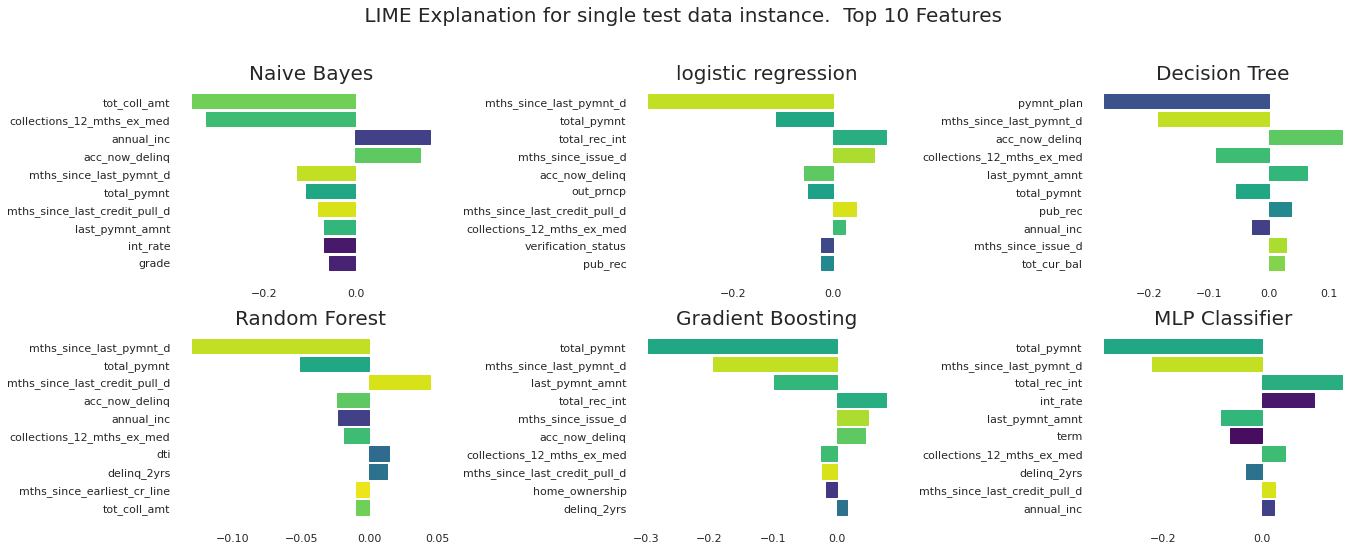

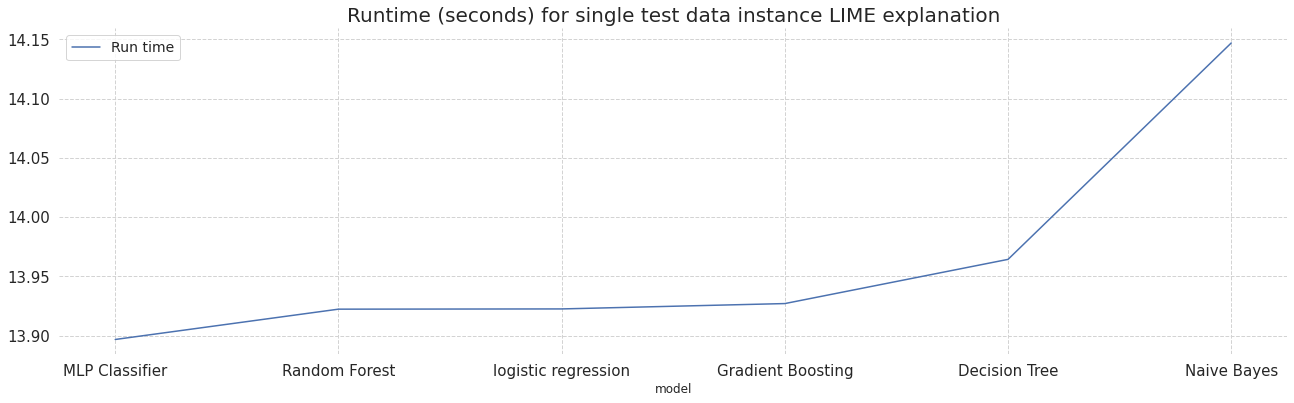

In [23]:
color_list =  sns.color_palette("viridis", len(X.columns)) 

def plot_lime_exp(fig, fig_index, exp_data, title):
  features =  list(exp_data.keys())[::-1]
  explanations = list(exp_data.values())[::-1]
  ax = fig.add_subplot(fig_index) 
  lime_bar = ax.barh( features, explanations ) 
  ax.set_title(title, fontsize = 20)
  for i,bar in enumerate(lime_bar):
    bar.set_color(color_list[list(X.columns).index(features[i])])
    plt.box(False) 
fig = plt.figure(figsize=(19,8))

# Plot lime explanations for trained models
for i, dex in enumerate(lime_data_explainations):
  fig_index = int("23" + str(i+1))
  plot_lime_exp(fig, fig_index, lime_data_explainations[i], trained_models[i]["name"])

plt.suptitle( " LIME Explanation for single test data instance.  Top " + str(top_x) + " Features", fontsize=20, fontweight="normal")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot run time for explanations
lx_df = pd.DataFrame(lime_explanation_time)
lx_df.sort_values("time", inplace=True)
setup_plot()
lx_ax = lx_df.plot(kind="line", x="model", title="Runtime (seconds) for single test data instance LIME explanation", figsize=(22,6))
lx_ax.title.set_size(20)
lx_ax.legend(["Run time"])
plt.box(False)

**Should we trust the above explanations from LIME ?**

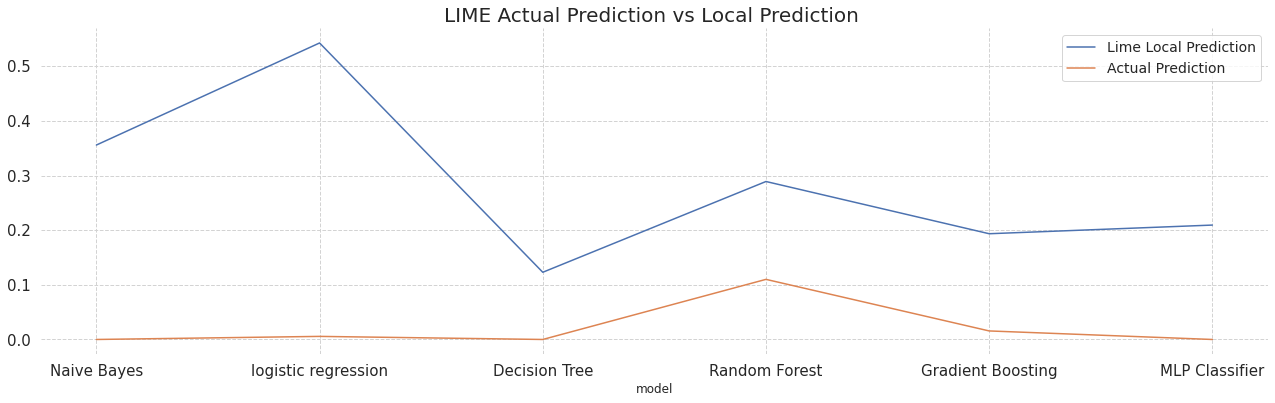

In [24]:
# Plot run time for explanations
lime_metrics_df = pd.DataFrame(lime_metrics)  
lime_metrics_df_ax = lime_metrics_df[["lime class1", "actual class1", "model"]].plot(kind="line", x="model", title="LIME Actual Prediction vs Local Prediction ", figsize=(22,6))
lime_metrics_df_ax.title.set_size(20)
lime_metrics_df_ax.legend(["Lime Local Prediction", "Actual Prediction"])
plt.box(False)

In [25]:
import shap
#explainer = shap.KernelExplainer(model.predict_proba, background_data)
#shap_values = explainer.shap_values(X_test)

**SHAP Kernel Explainer**

In [26]:
current_model = trained_models[3] # Explain the Random Forest Model
clf = current_model["model"]["clf"]
scaler = current_model["model"]["scaler"]
scaled_train_data = scaler.transform(X_train)
sub_sampled_train_data = shap.sample(scaled_train_data, 600, random_state=0) # use 600 samples of train data as background data

scaled_test_data = scaler.transform(X_test) 
subsampled_test_data =scaled_test_data[test_data_index].reshape(1,-1)

start_time = time.time()
explainer = shap.KernelExplainer(clf.predict_proba, sub_sampled_train_data)
shap_values = explainer.shap_values(subsampled_test_data,  l1_reg="aic")
elapsed_time = time.time() - start_time
# explain first sample from test data
print("Kernel Explainer SHAP run time", round(elapsed_time,3) , " seconds. ", current_model["name"])
print("SHAP expected value", explainer.expected_value)
print("Model mean value", clf.predict_proba(scaled_train_data).mean(axis=0))
print("Model prediction for test data", clf.predict_proba(subsampled_test_data))
shap.initjs()
pred_ind = 0
shap.force_plot(explainer.expected_value[1], shap_values[1][0], subsampled_test_data[0], feature_names=X_train.columns)

  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 23.613  seconds.  Random Forest
SHAP expected value [0.0921 0.9079]
Model mean value [0.09971862 0.90028138]
Model prediction for test data [[0.89 0.11]]


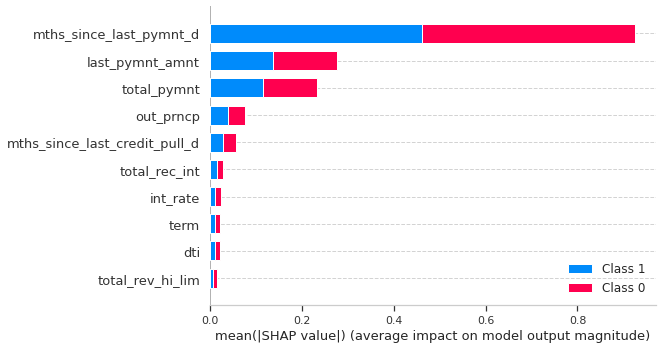

In [27]:
shap.initjs()
shap.summary_plot(shap_values, subsampled_test_data, feature_names=X_train.columns, max_display=10)

**SHAP Tree Explainer (Faster than Kernel Explainer)**

In [28]:
current_model = trained_models[3]
clf = current_model["model"]["clf"]
scaler = current_model["model"]["scaler"]
 
scaled_test_data = scaler.transform(X_test) 
subsampled_test_data =scaled_test_data[test_data_index].reshape(1,-1)

# explain first sample from test data
start_time = time.time()
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(subsampled_test_data)
elapsed_time = time.time() - start_time

print("Tree Explainer SHAP run time", round(elapsed_time,3) , " seconds. ", current_model["name"])
print("SHAP expected value", explainer.expected_value)
print("Model mean value", clf.predict_proba(scaled_train_data).mean(axis=0))
print("Model prediction for test data", clf.predict_proba(subsampled_test_data))
shap.initjs()
pred_ind = 0
shap.force_plot(explainer.expected_value[1], shap_values[1][0], subsampled_test_data[0], feature_names=X_train.columns)



Tree Explainer SHAP run time 0.573  seconds.  Random Forest
SHAP expected value [0.09961495 0.90038505]
Model mean value [0.09971862 0.90028138]
Model prediction for test data [[0.89 0.11]]


**Explain a Test Data instance for all models**

In [29]:
import shap

def get_kernel_shap_explainer(model, background_data, train_data):  
  shap_explainer = shap.KernelExplainer(model.predict_proba, background_data)   
  return shap_explainer 

def shap_explain(explainer, test_data): 
  shap_values = explainer.shap_values(test_data, l1_reg="aic")
  
  return shap_values

shap_data_explainations = []
shape_explanation_time = []
feat_names = list(X.columns) 
data_subsample = 500 
for current_model in trained_models:  
  scaler = current_model["model"]["scaler"]
  scaled_test_data = scaler.transform(X_test)
  scaled_train_data = scaler.transform(X_train)
  sampled_scaled_train_data = shap.sample(scaled_train_data, data_subsample) # subsample background data to make things faster
  
  start_time = time.time()
  shap_explainer  = get_kernel_shap_explainer(current_model["model"]["clf"], sampled_scaled_train_data, scaled_train_data)

  # explain first sample from test data 
  sampled_scaled_test_data = scaled_test_data[test_data_index].reshape(1,-1)
  shap_values = shap_explain(shap_explainer, sampled_scaled_test_data) 
  elapsed_time = time.time() - start_time 
  idx = np.argsort(np.abs(shap_values[1][0]))[::-1] 
  ex_holder = { feat_names[idx[i]] : shap_values[1][0][idx[i]] for i in range(top_x)} 
   
 
  shap_data_explainations.append(ex_holder) 
  shape_explanation_time.append({"time": elapsed_time, "model": current_model["name"] })
  

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

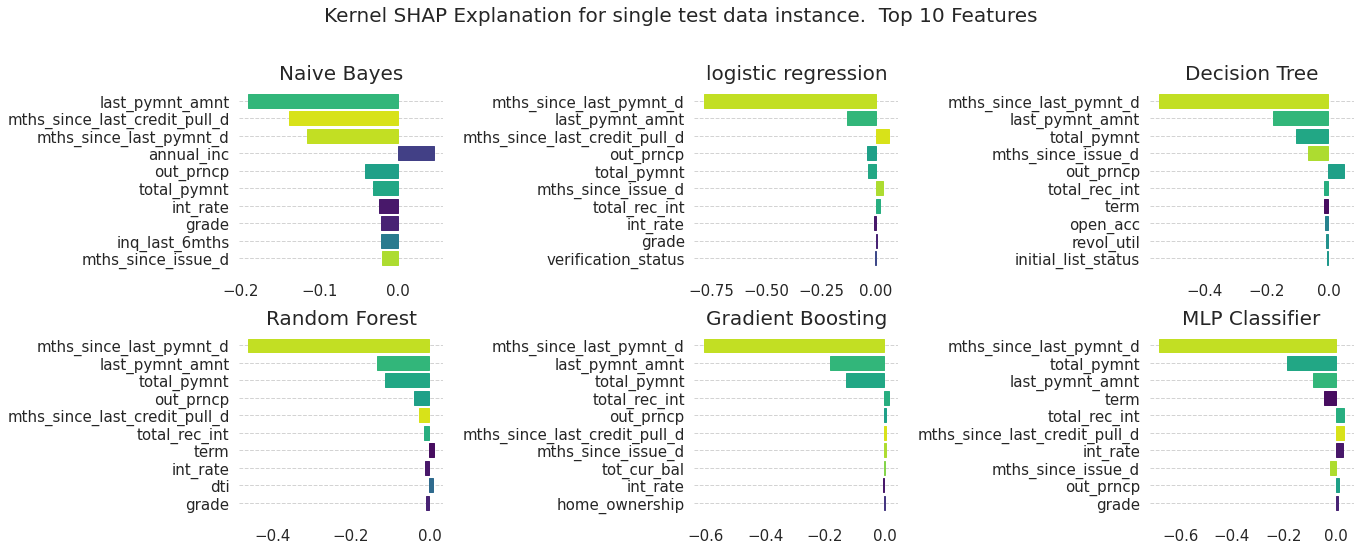

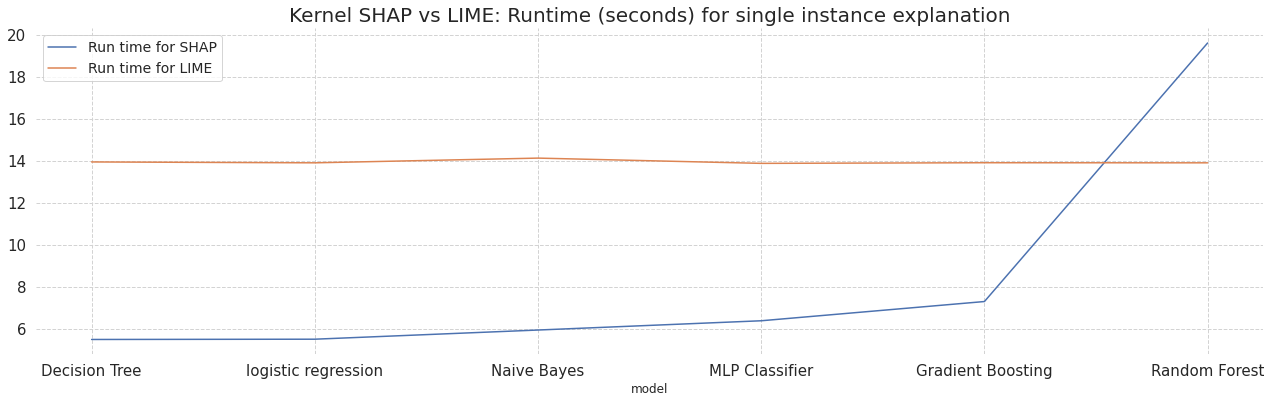

In [30]:
def plot_shap_exp(fig, fig_index, exp_data, title):
  features =  list(exp_data.keys())[::-1]
  explanations = list(exp_data.values())[::-1]
  ax = fig.add_subplot(fig_index) 
  lime_bar = ax.barh( features, explanations ) 
  ax.set_title(title, fontsize = 20)
  for i,bar in enumerate(lime_bar):
    bar.set_color(color_list[list(current_data.columns).index(features[i])])
    plt.box(False) 


# Plot SHAP explanations for a given test set item
fig = plt.figure(figsize=(19,8))
for i, dex in enumerate(shap_data_explainations):
  fig_index = int("23" + str(i+1))
  plot_lime_exp(fig, fig_index, shap_data_explainations[i], trained_models[i]["name"])

plt.suptitle( "Kernel SHAP Explanation for single test data instance.  Top " + str(top_x) + " Features", fontsize=20, fontweight="normal")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot SHAP explanation run time
shapx_df = pd.DataFrame(shape_explanation_time)
shapx_df.sort_values("time", inplace=True)
# setup_plot()
# shapx_df_ax = shapx_df.plot(kind="line", x="model", title="Runtime (seconds) for single instance SHAP explanation", figsize=(22,6))
# shapx_df_ax.title.set_size(20)
# shapx_df_ax.legend(["Run time"])
# plt.box(False)


# Plot both LIME and SHAP explanation run times
m_df =  shapx_df.merge(lx_df, on="model", suffixes=("_SHAP", "_LIME")) 
m_df.head() 
mx_df_ax = m_df.plot(kind="line", x="model", title="Kernel SHAP vs LIME: Runtime (seconds) for single instance explanation", figsize=(22,6))
mx_df_ax.title.set_size(20)
mx_df_ax.legend(["Run time for SHAP", "Run time for LIME"])
plt.box(False)

# Acknowledgement: 

[Colab research notebooks on LIME and SHAP for model interpretablity](https://colab.research.google.com/drive/1pjPzsw_uZew-Zcz646JTkRDhF2GkPk0N#scrollTo=-YRBzUfRVTTD) 
